## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
summaryMergeDF  = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='left')
summaryMergeDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

tumorMean = summaryMergeDF.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)']
tumorMedian = summaryMergeDF.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
tumorVariance = summaryMergeDF.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
tumorDeviation = summaryMergeDF.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
tumorSEM = summaryMergeDF.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summaryTumorVolumeDF = pd.DataFrame({'Tumor Mean': tumorMean,
                                     'Tumor Median': tumorMedian,
                                     'Tumor Variance': tumorVariance,
                                     'Standard Deviation': tumorDeviation,
                                     'Tumor Error Mean': tumorSEM})
summaryTumorVolumeDF

,Tumor Mean,Tumor Median,Tumor Variance,Standard Deviation,Tumor Error Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

Text(0, 0.5, 'count')

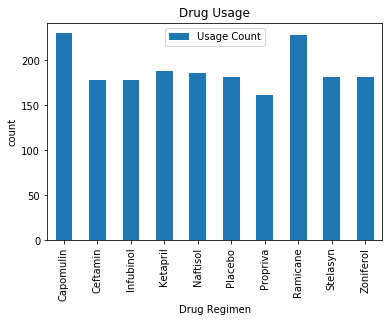

In [6]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
groupedTable = summaryMergeDF.groupby('Drug Regimen')
drugNameDF = summaryMergeDF.loc[:,["Drug Regimen"]]
drugNameDF = drugNameDF["Drug Regimen"].unique()
drugCount = groupedTable["Drug Regimen"].count()
summaryTableDrugDF = pd.DataFrame({'Drug Name': drugNameDF,
                                   'Usage Count': drugCount})
ax = summaryTableDrugDF.plot(kind="bar", title='Drug Usage')
ax.set_ylabel('count')

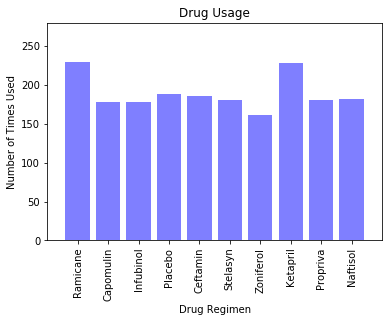

In [8]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
groupedTable = summaryMergeDF.groupby('Drug Regimen')
drugNameDF = summaryMergeDF.loc[:,["Drug Regimen"]]
drugCount = groupedTable['Drug Regimen'].count()

drugName = drugNameDF['Drug Regimen'].unique()

x_axis = np.arange(len(drugCount))

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugName, rotation="vertical")
plt.bar(x_axis,drugCount, color='b',alpha=0.5, align="center")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(drugCount)+50)

plt.title("Drug Usage")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Times Used")
plt.show()

## Pie plots

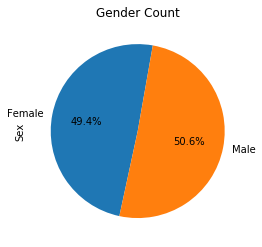

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genderDF = summaryMergeDF.groupby(['Sex'])
genderCountsDF = genderDF['Sex'].count()
ax = genderCountsDF.plot.pie(autopct='%1.1f%%', title='Gender Count', startangle=80)

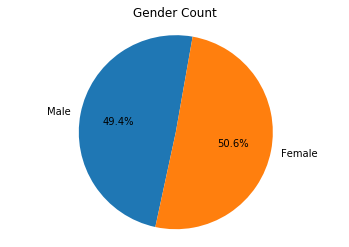

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genderDF = summaryMergeDF.groupby('Sex')
genders = summaryMergeDF['Sex'].unique()
genderCountsDF = genderDF['Sex'].count()
plt.pie(genderCountsDF, labels=genders, autopct="%1.1f%%", startangle=80)
plt.title('Gender Count')
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [142]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

groupedDataMax = summaryMergeDF.groupby(["Mouse ID"]).max()
groupedDataMax = groupedDataMax.reset_index()
groupedDataTime = groupedDataMax[["Mouse ID", "Timepoint"]]
mergedData = pd.merge(groupedDataTime, summaryMergeDF, on=['Mouse ID','Timepoint'], how='left')


infubinol = pd.DataFrame({'Tumor Volume': mergedData.loc[(mergedData["Drug Regimen"] == 'Infubinol')]['Tumor Volume (mm3)']})
placebo = pd.DataFrame({'Tumor Volume': mergedData.loc[(mergedData["Drug Regimen"] == 'Placebo')]['Tumor Volume (mm3)']})
ceftamin = pd.DataFrame({'Tumor Volume': mergedData.loc[(mergedData["Drug Regimen"] == 'Ceftamin')]['Tumor Volume (mm3)']})
stelasyn = pd.DataFrame({'Tumor Volume': mergedData.loc[(mergedData["Drug Regimen"] == 'Stelasyn')]['Tumor Volume (mm3)']})

quartiles = infubinol['Tumor Volume'].quantile([.25,.5,.75])
lowerQ = quartiles[0.25]
upperQ = quartiles[0.75]
iqr = upperQ-lowerQ

print(f"The lower quartile of infubinol is: {round(lowerQ,2)}")
print(f"The upper quartile of infubinol is: {round(upperQ,2)}")
print(f"The interquartile range of infubinol is: {round(iqr,2)}")

lowerBound = lowerQ - (1.5*iqr)
upperBound = upperQ + (1.5*iqr)

print(f"Values below {round(lowerBound,2)} could be outliers.")
print(f"Values above {round(upperBound,2)} could be outliers.")

infubinolOutliers = infubinol.loc[(infubinol['Tumor Volume'] < lowerBound) | (infubinol['Tumor Volume'] > upperBound)]
infOutlierCount = infubinolOutliers['Tumor Volume'].count()
print(('there are {0} outliers.').format(infOutlierCount))

print('')
quartiles = placebo['Tumor Volume'].quantile([.25,.5,.75])
lowerQ = quartiles[0.25]
upperQ = quartiles[0.75]
iqr = upperQ-lowerQ

print(f"The lower quartile of placebo is: {round(lowerQ,2)}")
print(f"The upper quartile of placebo is: {round(upperQ,2)}")
print(f"The interquartile range of placebo is: {round(iqr,2)}")

lowerBound = lowerQ - (1.5*iqr)
upperBound = upperQ + (1.5*iqr)

print(f"Values below {round(lowerBound,2)} could be outliers.")
print(f"Values above {round(upperBound,2)} could be outliers.")

placeboOutliers = placebo.loc[(placebo['Tumor Volume'] < lowerBound) | (placebo['Tumor Volume'] > upperBound)]
placeboOutCount = placeboOutliers['Tumor Volume'].count()
print(('there are {0} outliers.').format(placeboOutCount))

print('')
quartiles = ceftamin['Tumor Volume'].quantile([.25,.5,.75])
lowerQ = quartiles[0.25]
upperQ = quartiles[0.75]
iqr = upperQ-lowerQ

print(f"The lower quartile of ceftamin is: {round(lowerQ,2)}")
print(f"The upper quartile of ceftamin is: {round(upperQ,2)}")
print(f"The interquartile range of ceftamin is: {round(iqr,2)}")

lowerBound = lowerQ - (1.5*iqr)
upperBound = upperQ + (1.5*iqr)

print(f"Values below {round(lowerBound,2)} could be outliers.")
print(f"Values above {round(upperBound,2)} could be outliers.")

ceftaminOutliers = ceftamin.loc[(ceftamin['Tumor Volume'] < lowerBound) | (ceftamin['Tumor Volume'] > upperBound)]
ceftaminOutCount = ceftaminOutliers['Tumor Volume'].count()
print(('there are {0} outliers.').format(ceftaminOutCount))

print('')
quartiles = stelasyn['Tumor Volume'].quantile([.25,.5,.75])
lowerQ = quartiles[0.25]
upperQ = quartiles[0.75]
iqr = upperQ-lowerQ

print(f"The lower quartile of stelasyn is: {round(lowerQ,2)}")
print(f"The upper quartile of stelasyn is: {round(upperQ,2)}")
print(f"The interquartile range of stelasyn is: {round(iqr,2)}")

lowerBound = lowerQ - (1.5*iqr)
upperBound = upperQ + (1.5*iqr)

print(f"Values below {round(lowerBound,2)} could be outliers.")
print(f"Values above {round(upperBound,2)} could be outliers.")
stelasynOutliers = stelasyn.loc[(stelasyn['Tumor Volume'] < lowerBound) | (stelasyn['Tumor Volume'] > upperBound)]
stelasynOutCount = stelasynOutliers['Tumor Volume'].count()
print(('there are {0} outliers.').format(stelasynOutCount))
mergedData.head()

The lower quartile of infubinol is: 54.05
The upper quartile of infubinol is: 65.53
The interquartile range of infubinol is: 11.48
Values below 36.83 could be outliers.
Values above 82.74 could be outliers.
there are 1 outliers.

The lower quartile of placebo is: 52.94
The upper quartile of placebo is: 68.13
The interquartile range of placebo is: 15.19
Values below 30.16 could be outliers.
Values above 90.92 could be outliers.
there are 0 outliers.

The lower quartile of ceftamin is: 48.72
The upper quartile of ceftamin is: 64.3
The interquartile range of ceftamin is: 15.58
Values below 25.36 could be outliers.
Values above 87.67 could be outliers.
there are 0 outliers.

The lower quartile of stelasyn is: 52.48
The upper quartile of stelasyn is: 69.1
The interquartile range of stelasyn is: 16.63
Values below 27.54 could be outliers.
Values above 94.04 could be outliers.
there are 0 outliers.


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


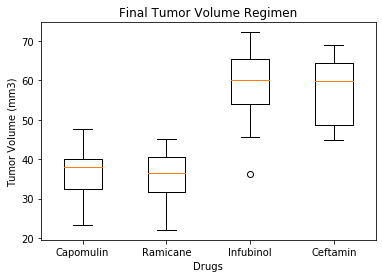

In [144]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

infubinol = mergedData[(mergedData["Drug Regimen"] == 'Infubinol')]['Tumor Volume (mm3)']
ramicane = mergedData[(mergedData["Drug Regimen"] == 'Ramicane')]['Tumor Volume (mm3)']
capomulin = mergedData[(mergedData["Drug Regimen"] == 'Capomulin')]['Tumor Volume (mm3)']
ceftamin = mergedData[(mergedData["Drug Regimen"] == 'Ceftamin')]['Tumor Volume (mm3)']

summaryDrugs = [capomulin, ramicane, infubinol, ceftamin]

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.set_xlabel('Drugs')
ax1.set_xticklabels(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
ax1.boxplot(summaryDrugs)

plt.show()


## Line and scatter plots

[Text(0, 0.5, 'Tumor Volume (mm3)')]

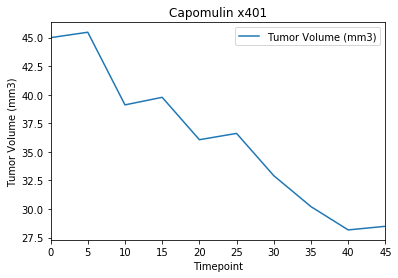

In [113]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouseCapomulin = summaryMergeDF[(summaryMergeDF["Mouse ID"] == 'x401')]
mouseCapomulin = mouseCapomulin[['Tumor Volume (mm3)', 'Timepoint']]
mouseCapomulin = mouseCapomulin.set_index(['Timepoint'])
ax = mouseCapomulin.plot.line(title = 'Capomulin x401')
ax.set(ylabel='Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

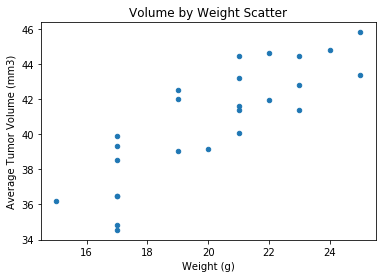

In [116]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulinAll = summaryMergeDF[(summaryMergeDF["Drug Regimen"] == 'Capomulin')]
capomulinAll = capomulinAll.groupby(['Mouse ID']).mean()
ax = capomulinAll.plot.scatter(title='Volume by Weight Scatter', x='Weight (g)', y='Tumor Volume (mm3)')
ax.set_ylabel('Average Tumor Volume (mm3)')

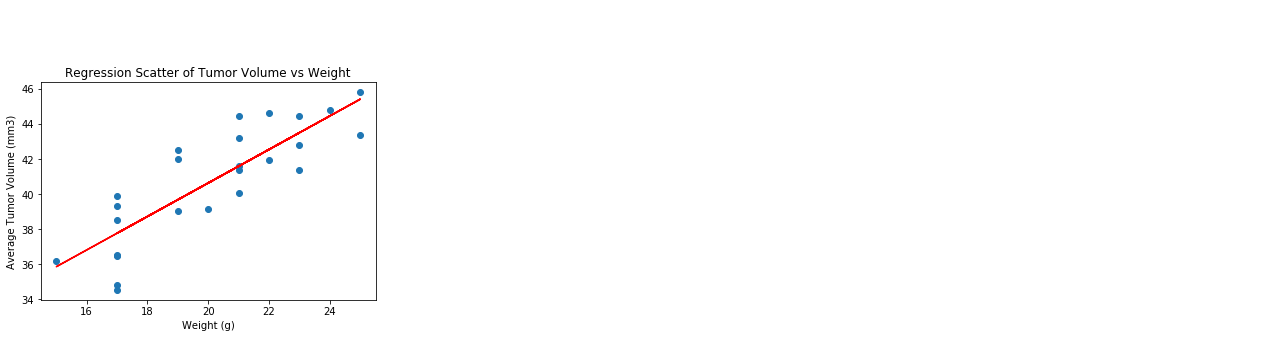

The correlation Coefficient is: 0.84


In [120]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
capomulinAll = summaryMergeDF[(summaryMergeDF["Drug Regimen"] == 'Capomulin')]
capomulinAll = capomulinAll.groupby(['Mouse ID']).mean()

xValue= capomulinAll['Weight (g)']
yValue = capomulinAll['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(xValue, yValue)
regressValues = xValue * slope + intercept
lineEQ = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(xValue,yValue)
plt.plot(xValue,regressValues,"r-")
plt.annotate(lineEQ,(50,50),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Regression Scatter of Tumor Volume vs Weight')
plt.show()
correlation = st.pearsonr(xValue,yValue)

print(f'The correlation Coefficient is: {round(correlation[0],2)}')